# Project

Generally, Asians look upon abalone as an expensive ingredient but many people find it hard to classify the gender and age of the abalone since they look the same. So people find it hard to classify the abalone quality. The accuracy of the model is also generally low. It is easy to detect if it is an infant, but the data for males and females are too similar, making it very difficult for us to improve the accuracy.

* Firstly import the packages to be used.

In [1]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# * Load the dataset.

In [2]:
df = pd.read_csv('abalone.csv')
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Concise summary of the data.

In [3]:
df.shape

(4177, 9)

Concise summary of the data.

In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Find if missing values is present.

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Get the distribution of the target variable.

<AxesSubplot:xlabel='Sex', ylabel='count'>

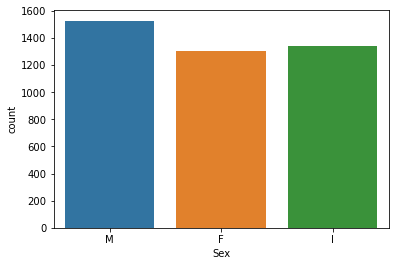

In [6]:
sns.countplot(x="Sex", data = df)

Distribution map of diameter and weight

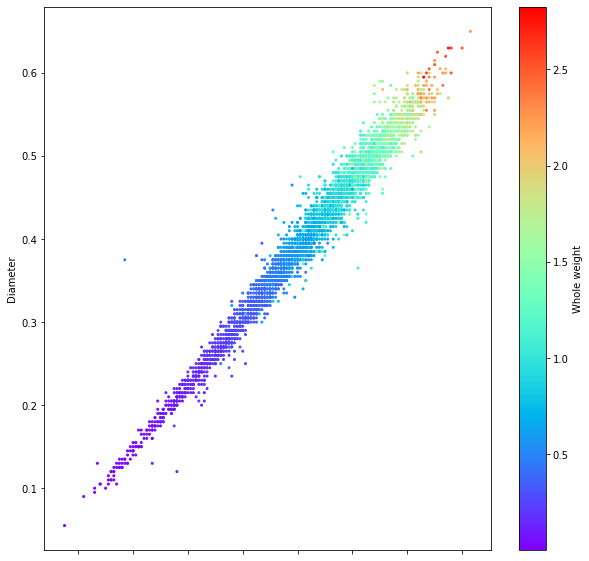

In [7]:
df.plot(kind="scatter", x="Length", y="Diameter", c="Whole weight", cmap="rainbow", s=4, figsize=(10, 10))
plt.show()

Distribution map of diameter and height

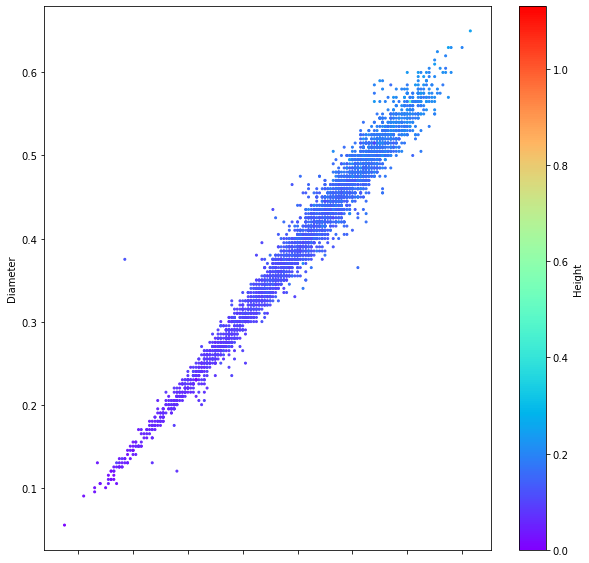

In [8]:
df.plot(kind="scatter", x="Length", y="Diameter", c="Height", cmap="rainbow", s=4, figsize=(10, 10))
plt.show()

Distribution map of diameter and ring

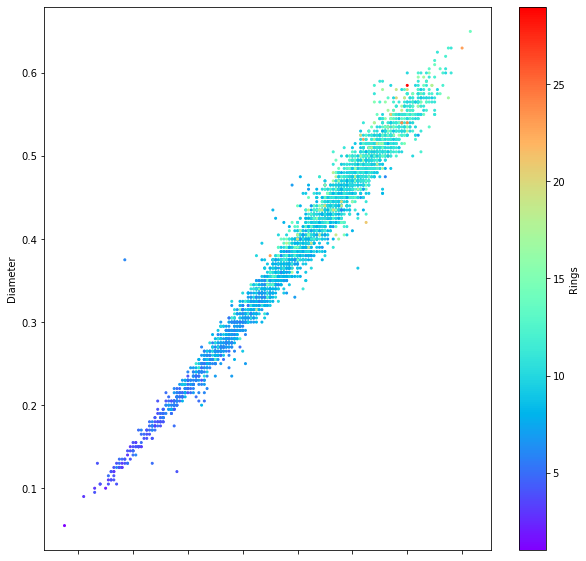

In [9]:
df.plot(kind="scatter", x="Length", y="Diameter", c="Rings", cmap="rainbow", s=4, figsize=(10, 10))
plt.show()

# Feature Selection


Divide the dataset into the Training set and Test set. Test set occupies 25% of the 4177 samples. 

In [10]:
X = df[['Length','Diameter','Height','Whole weight','Rings']]
y = df['Sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (3132, 5) (3132,)
Testing set shape:  (1045, 5) (1045,)



gets the best 2 features with highest scores. 

In [11]:
# Get the two best(k = 2) features using the SelectKBest method
ft = SelectKBest(chi2, k = 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [ 26.00467606  23.80026008  10.72368199 281.41744372 613.71803538]
Columns:  Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Rings'], dtype='object')


gets the best 2 features with impact highest scores.

In [12]:
ft = SelectKBest(f_classif, k= 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [695.04737314 742.40178912 556.79046178 715.91497737 363.68293306]
Columns:  Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Rings'], dtype='object')


# Preprocessing

These 2 lines remove the unselected features and keep the 2 selected features in X_train and X_test

In [13]:
from sklearn import preprocessing

X_train_2 = ft.transform(X_train)
X_test_2 = ft.transform(X_test)

X_train = preprocessing.StandardScaler().fit(X_train_2).transform(X_train_2.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test_2).transform(X_test_2.astype(float))

# Logistic Regression Classifier

Set C to 100,000, where C is the inverse of regularization strength 𝜆, (C =1/𝜆) and set the number of iteration to 3000.

In [14]:
logreg = linear_model.LogisticRegression(C=100000, max_iter=3000)
logreg_trained = logreg.fit(X_train, y_train)

In [15]:

print('Accuracy: %f' % logreg_trained.score(X_test, y_test))

#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, logreg_trained.predict(X_test))

Accuracy: 0.542584


# Naïve Bayes Classifier

Fit the test set X_test to the trained model.
Compare the prediction results with y_test and show the correction prediction rate. 

In [16]:
modelnb = GaussianNB()
trained_model = modelnb.fit(X_train, y_train)
print('Accuracy: %f' % trained_model.score(X_test, y_test))

from sklearn.metrics import accuracy_score
accuracy_score(y_test, trained_model.predict(X_test))

Accuracy: 0.525359


0.5253588516746411

# KNN

compare yhat with y_test and find the rate of the correct prediction. 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

mean_acc = np.zeros(20)
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.42296651, 0.4277512 , 0.47177033, 0.49282297, 0.48516746,
       0.48995215, 0.48516746, 0.48421053, 0.49952153, 0.5062201 ,
       0.49090909, 0.49665072, 0.50047847, 0.50334928, 0.50526316,
       0.51100478, 0.51578947, 0.51100478, 0.50430622, 0.50047847])

That shows the error rate can be improved if more neighbors are considered for making the decision. 


Text(0, 0.5, 'Error Rate')

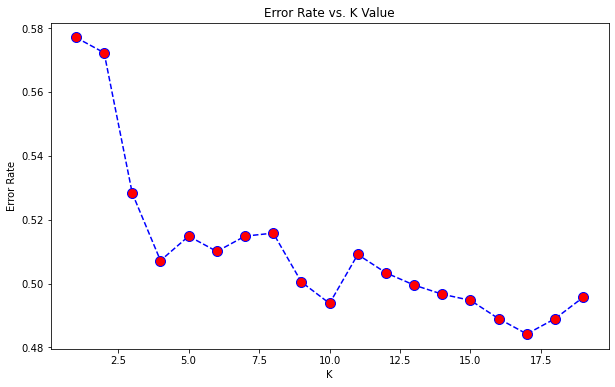

In [18]:
error_rate = []

# check the error rate for k=1 to k=40
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Show the plot of accuracy vs k (number of nearest neighbors) 


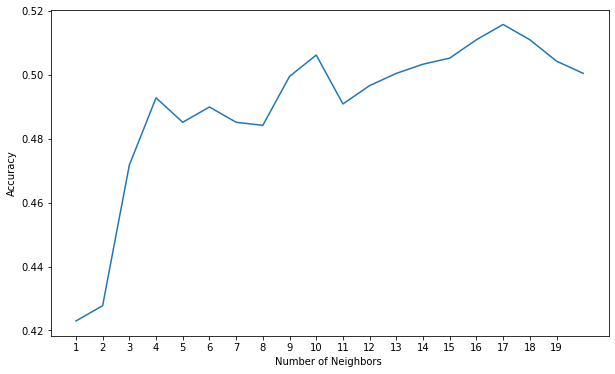

In [19]:
loc = np.arange(1,20,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

# Hyperparameter Tuning

get the n-neighbors and metric in kNN

In [20]:
grid_params = { 'n_neighbors' : [4,7,9,11,13,17],
               'metric' : ['minkowski','euclidean','manhattan']}


Totally, 6 x 3 = 18 combinations.

Each of these 18 combinations will be set as the hyperparameters of the kNN for 3-fold cross-validation for finding the average performance/accuracy of the KNN with that hyperparameter set. 

So, the kNN will be implemented 3 x 18 = 56 times totally.

In [21]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [22]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [23]:
# find the best score
g_res.best_score_

0.5194763729246489

In [24]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 17}

In [25]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 17, metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [26]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

# Model Evaluation

KNN

calculate the rate of correct predictions (accuracy) in y_hat by comparing the class labels in y_train.
calculate the rate of correct predictions (accuracy) in y_knn by comparing the class labels in y_test.


In [27]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.5948275862068966
Test set accuracy:  0.5157894736842106


compute the confusion matrix for the predictions in y_knn and Target Class values in y_test.

In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[113  58 145]
 [ 40 271  48]
 [137  78 155]]


generate report showing precision, recall, accuracy and F1-score.


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           F       0.39      0.36      0.37       316
           I       0.67      0.75      0.71       359
           M       0.45      0.42      0.43       370

    accuracy                           0.52      1045
   macro avg       0.50      0.51      0.50      1045
weighted avg       0.50      0.52      0.51      1045



Finally, shows the mean of these 17 values as the mean accuarcy.

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =17)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.5226188036190086


In [34]:
modelnb = GaussianNB()
trained_model = modelnb.fit(X_train, y_train)
print('Accuracy: %f' % trained_model.score(X_test, y_test))

from sklearn.metrics import accuracy_score
accuracy_score(y_test, trained_model.predict(X_test))

Accuracy: 0.525359


0.5253588516746411

# model Compare


Prepare the models.

In [41]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=10000)))
models.append(('adjusted LR', logreg))
models.append(('KNN', KNeighborsClassifier()))
models.append(('adjusted KNN', knn))
models.append(('NB', GaussianNB()))
models.append(('adjusted NB', trained_model))

* Evaluate each model in turn and display the results including the mean accuraries and mean standard deviations.

In [46]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.540585 (0.080629)
adjusted LR: 0.544901 (0.079748)
KNN: 0.501072 (0.069442)
adjusted KNN: 0.518551 (0.085475)
NB: 0.517361 (0.064920)
adjusted NB: 0.517361 (0.064920)


* Display the boxplots for comparison.

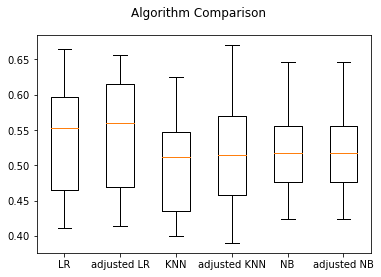

In [47]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()